In [1]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/cifar10/naive

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 452, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 452 (delta 11), reused 26 (delta 7), pack-reused 374 (from 3)
Receiving objects: 100% (452/452), 628.82 MiB | 34.02 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Updating files: 100% (66/66), done.
/kaggle/working/machine_unlearning_experiments/experiments/cifar10/naive


## Dependecies

In [2]:
import sys
from pathlib import Path
from torchvision import datasets

## Utils

In [3]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics 
from utils.train_test_metrics import show_metrics

# Init model
from models.resnet50 import init_model_resnet50

Device used: cuda


## Parameters (arbitrary chosen)

In [5]:
BATCH_SIZE = 256
LEARNING_RATE = 5e-5
EPOCHS = 5

# Simple base training

## Init model

In [6]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(learning_rate=LEARNING_RATE, fc_output=10)
import torch.nn as nn
model = nn.DataParallel(model, device_ids=[0,1])

Init model...


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s] 


Done initializing model.
Model ID: 139195188177232, Optimizer ID: 139195147632400, Criterion ID: 139195147632496


## Init dataloaders

In [7]:
train_dataset = datasets.CIFAR10(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root=data_root, train=False, transform=transform, download=True)
data_split_path = 'cifar10_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(train_dataset, test_dataset), 
    val_ratio=0.2,
    batch_size=BATCH_SIZE,
    info_file_path = data_split_path, 
    )

100%|██████████| 170498071/170498071 [00:05<00:00, 28433187.59it/s]


Extracting /kaggle/working/machine_unlearning_experiments/data/cifar-10-python.tar.gz to /kaggle/working/machine_unlearning_experiments/data
Files already downloaded and verified
Prepare DataLoaders...
Done preparing DataLoaders.


## Call train

In [8]:
import time

start_time = time.perf_counter()
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Training Epoch 1/5:   0%|          | 0/157 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/40 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


Epoch [1/5], Train Loss: 0.8840, Train Accuracy: 0.7583, Val Loss: 0.2162, Val Accuracy: 0.9315
Epoch 1: New best validation accuracy: 0.9315. Model saved to ResNet50_CIFAR10_model.pth.


Training Epoch 2/5:   0%|          | 0/157 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/40 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


Epoch [2/5], Train Loss: 0.1491, Train Accuracy: 0.9539, Val Loss: 0.1616, Val Accuracy: 0.9469
Epoch 2: New best validation accuracy: 0.9469. Model saved to ResNet50_CIFAR10_model.pth.


Training Epoch 3/5:   0%|          | 0/157 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/40 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


Epoch [3/5], Train Loss: 0.0501, Train Accuracy: 0.9862, Val Loss: 0.1519, Val Accuracy: 0.9523
Epoch 3: New best validation accuracy: 0.9523. Model saved to ResNet50_CIFAR10_model.pth.


Training Epoch 4/5:   0%|          | 0/157 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/40 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 40/40 [00:35<00:00,  1.11it/s]


Epoch [4/5], Train Loss: 0.0207, Train Accuracy: 0.9948, Val Loss: 0.1675, Val Accuracy: 0.9500


Training Epoch 5/5:   0%|          | 0/157 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/40 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]

Epoch [5/5], Train Loss: 0.0162, Train Accuracy: 0.9958, Val Loss: 0.1656, Val Accuracy: 0.9516
Training complete for ResNet50_CIFAR10. Training stats saved to 'ResNet50_CIFAR10_history.json'.
Execution time: 1782.014009 seconds


## Plot history losses

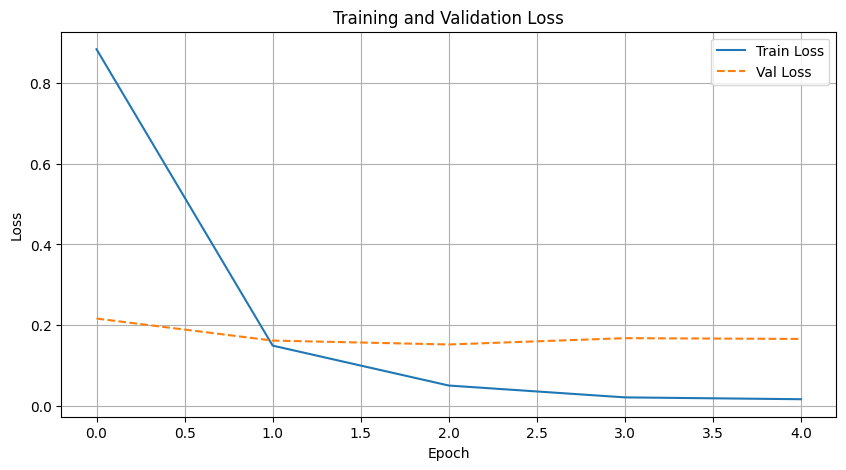

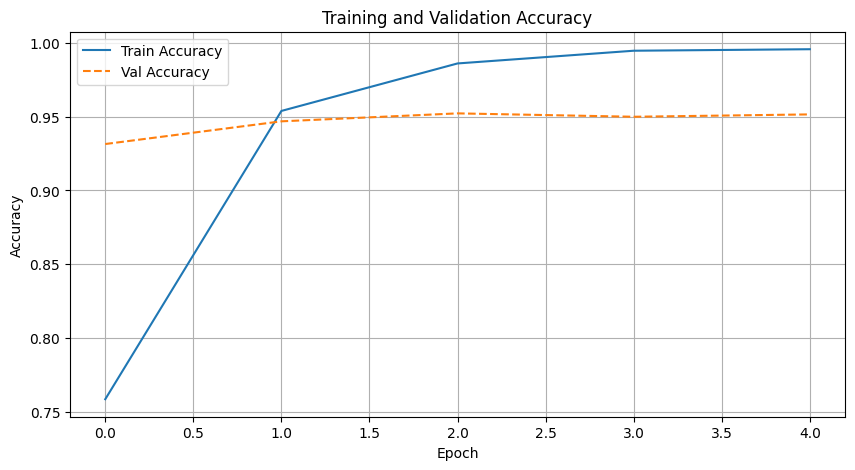

In [9]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Call test

In [10]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: ResNet50_CIFAR10


Evaluating model: ResNet50_CIFAR10_model.pth:   0%|          | 0/40 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating model: ResNet50_CIFAR10_model.pth: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]

Predictions and labels saved to ResNet50_CIFAR10_predictions.json


## Show metrics

Metrics for ResNet50_CIFAR10:
  - Test Accuracy: 0.9527
  - Precision: 0.9527
  - Recall: 0.9527
  - F1 Score: 0.9525


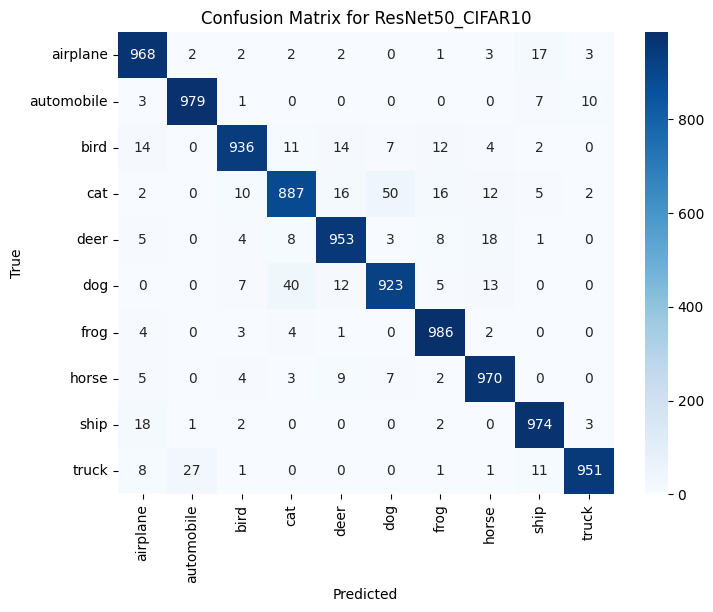

In [11]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive

In [8]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning

### Init new model

In [9]:
data_splits_file = "cifar10_data_splits.json"
unlearn_samples_file = "cifar10_samples_to_unlearn_30per.json"
updated_data_splits_path = "updated_cifar10_data_splits.json"

In [11]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(learning_rate=LEARNING_RATE, fc_output=10)
model_name = "naive_unlearning_" + model_name
import torch.nn as nn
model = nn.DataParallel(model, device_ids=[0,1])

Init model...
Done initializing model.
Model ID: 138735034136944, Optimizer ID: 138735034133296, Criterion ID: 138735034128208


### Init data

In [12]:
train_dataset = datasets.CIFAR10(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root=data_root, train=False, transform=transform, download=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 63627132.61it/s]


Extracting /kaggle/working/machine_unlearning_experiments/data/cifar-10-python.tar.gz to /kaggle/working/machine_unlearning_experiments/data
Files already downloaded and verified


## Select samples to unlearn

In [13]:
#ONLY ONCE
select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.3)

Unlearn indices saved to cifar10_samples_to_unlearn_30per.json


## Update data splits -> delete samples

In [14]:
update_splits_after_unlearning(data_splits_file, unlearn_samples_file, updated_data_splits_path)

Updated splits saved to updated_cifar10_data_splits.json


## Recreate DataLoaders from json files

In [15]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset), 
    batch_size=BATCH_SIZE)

Recreating DataLoaders...
Done recreating DataLoaders.


## Re-train

In [16]:
import time

start_time = time.perf_counter()
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Training Epoch 1/5:   0%|          | 0/110 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/28 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]


Epoch [1/5], Train Loss: 1.1396, Train Accuracy: 0.6876, Val Loss: 0.3012, Val Accuracy: 0.8999
Epoch 1: New best validation accuracy: 0.8999. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Training Epoch 2/5:   0%|          | 0/110 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/28 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]


Epoch [2/5], Train Loss: 0.2070, Train Accuracy: 0.9364, Val Loss: 0.1946, Val Accuracy: 0.9359
Epoch 2: New best validation accuracy: 0.9359. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Training Epoch 3/5:   0%|          | 0/110 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/28 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]


Epoch [3/5], Train Loss: 0.0728, Train Accuracy: 0.9797, Val Loss: 0.1747, Val Accuracy: 0.9434
Epoch 3: New best validation accuracy: 0.9434. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Training Epoch 4/5:   0%|          | 0/110 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/28 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]


Epoch [4/5], Train Loss: 0.0258, Train Accuracy: 0.9945, Val Loss: 0.1806, Val Accuracy: 0.9462
Epoch 4: New best validation accuracy: 0.9462. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Training Epoch 5/5:   0%|          | 0/110 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...:   0%|          | 0/28 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating on validation set...: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]

Epoch [5/5], Train Loss: 0.0128, Train Accuracy: 0.9973, Val Loss: 0.1873, Val Accuracy: 0.9451
Training complete for naive_unlearning_ResNet50_CIFAR10. Training stats saved to 'naive_unlearning_ResNet50_CIFAR10_history.json'.
Execution time: 1204.385306 seconds


## Plot history losses

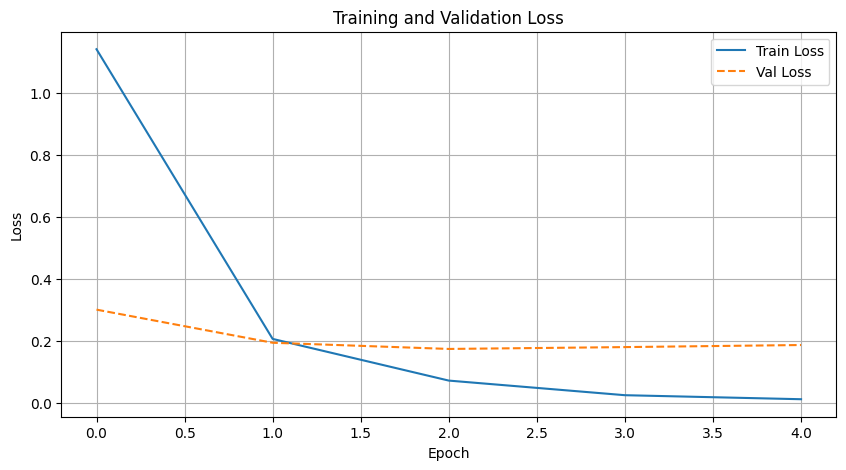

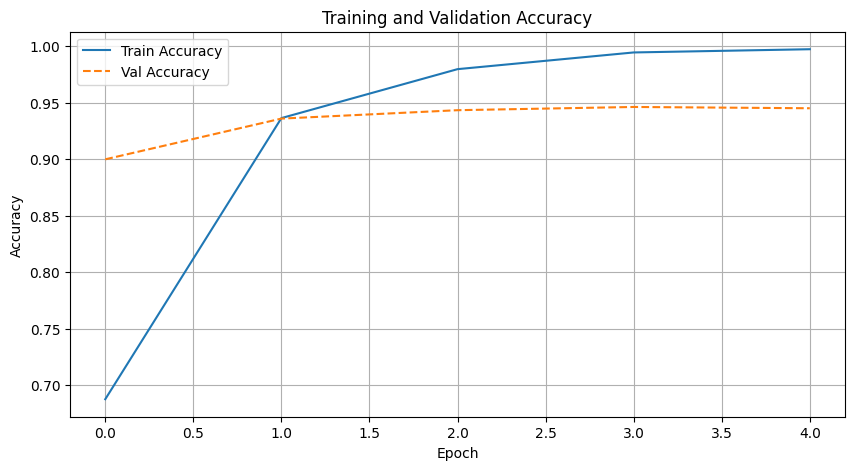

In [17]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Re-test

In [18]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: naive_unlearning_ResNet50_CIFAR10


Evaluating model: naive_unlearning_ResNet50_CIFAR10_model.pth:   0%|          | 0/40 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
Evaluating model: naive_unlearning_ResNet50_CIFAR10_model.pth: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


Predictions and labels saved to naive_unlearning_ResNet50_CIFAR10_predictions.json


## Show metrics

Metrics for naive_unlearning_ResNet50_CIFAR10:
  - Test Accuracy: 0.9435
  - Precision: 0.9435
  - Recall: 0.9435
  - F1 Score: 0.9435


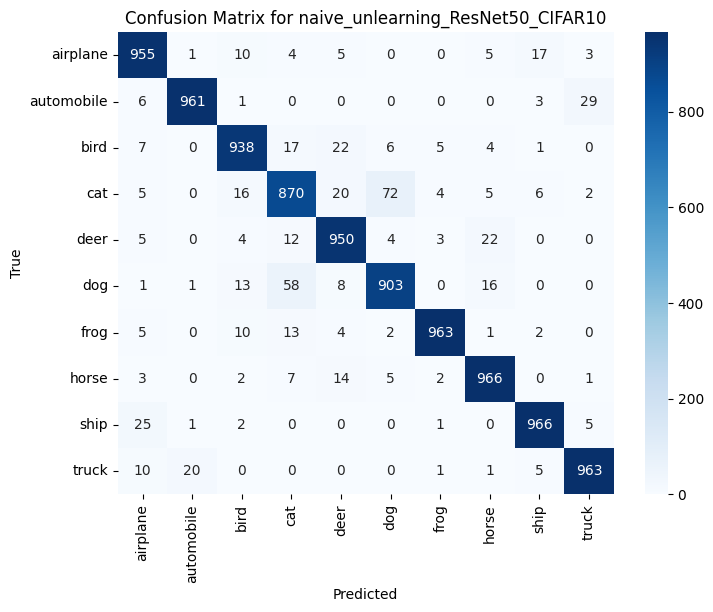

In [19]:
predictions_path = f'{model_name}_predictions.json'
show_metrics(predictions_path, classes, model_name)